In [5]:
#pip install mlxtend==0.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
#pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.2 MB/s 


In [6]:
############################ For regression: f_regression, mutual_info_regression
############################ For classification: chi2, f_classif, mutual_info_classif

from sklearn.metrics import r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import category_encoders as ce
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
from sklearn import tree
from mlxtend.evaluate import bias_variance_decomp

In [84]:
df = pd.read_csv('/content/sample_data/cpmp.csv')
df.head(5)

,instance_id,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,...,overstowage.pct,bflb,left.density,tier.weighted.groups,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm,runtime,runstatus
0,BF1_cpmp_16_5_48_10_29_1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,...,0.3625,29,0.382222,0.441162,0.509615,0.1750,0.0,idastar.symmulgt.transmul,0.004,ok
1,BF1_cpmp_16_5_48_10_29_12,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,...,0.3625,29,0.413333,0.427399,0.663462,0.3375,0.0,astar.symmullt.transmul,0.572,ok
2,BF1_cpmp_16_5_48_10_29_14,1,16,5,0.3125,0.6,0.1875,0.6250,0.833333,0,...,0.3625,29,0.111111,0.405997,0.615385,0.2625,0.0,idastar.symmulgt.transmul,0.764,ok
3,BF1_cpmp_16_5_48_10_29_15,1,16,5,0.3125,0.6,0.0625,0.5000,0.888889,0,...,0.3625,29,0.677778,0.409975,0.576923,0.1125,0.0,idastar.symmulgt.transmul,106.755,ok
4,BF1_cpmp_16_5_48_10_29_17,1,16,5,0.3125,0.6,0.1250,0.5625,0.900000,0,...,0.3625,29,0.471111,0.428914,0.569231,0.3375,0.0,idastar.symmulgt.transmul,0.008,ok


In [85]:
df = df.drop(['instance_id','runtime','runstatus','group.same.min','group.same.max'], axis=1)

In [86]:
df.head(5)

,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.mean,group.same.stdev,...,top.good.mean,top.good.stdev,overstowage.pct,bflb,left.density,tier.weighted.groups,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,4.36364,1.55346,...,4.60000,2.00998,0.3625,29,0.382222,0.441162,0.509615,0.1750,0.0,idastar.symmulgt.transmul
1,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,4.36364,1.61091,...,4.55556,2.26623,0.3625,29,0.413333,0.427399,0.663462,0.3375,0.0,astar.symmullt.transmul
2,1,16,5,0.3125,0.6,0.1875,0.6250,0.833333,4.36364,1.72008,...,4.30000,1.84662,0.3625,29,0.111111,0.405997,0.615385,0.2625,0.0,idastar.symmulgt.transmul
3,1,16,5,0.3125,0.6,0.0625,0.5000,0.888889,4.36364,1.61091,...,3.50000,2.29129,0.3625,29,0.677778,0.409975,0.576923,0.1125,0.0,idastar.symmulgt.transmul
4,1,16,5,0.3125,0.6,0.1250,0.5625,0.900000,4.36364,1.55346,...,4.66667,2.44949,0.3625,29,0.471111,0.428914,0.569231,0.3375,0.0,idastar.symmulgt.transmul


In [87]:
df.dtypes

repetition                       int64
stacks                           int64
tiers                            int64
stack.tier.ratio               float64
container.density              float64
empty.stack.pct                float64
overstowing.stack.pct          float64
overstowing.2cont.stack.pct    float64
group.same.mean                float64
group.same.stdev               float64
top.good.min                     int64
top.good.max                     int64
top.good.mean                  float64
top.good.stdev                 float64
overstowage.pct                float64
bflb                             int64
left.density                   float64
tier.weighted.groups           float64
avg.l1.top.left.lg.group       float64
cont.empty.grt.estack          float64
pct.bottom.pct.on.top          float64
algorithm                       object
dtype: object

In [88]:
df['bflb'] = np.log(df['bflb'])
df['stacks'] = np.log(df['stacks'])
df['tiers'] = np.log(df['tiers'])
df['repetition'] = np.log(df['repetition'])
df['top.good.min'] = np.log(df['top.good.min'])
df['top.good.max'] = np.log(df['top.good.max'])

In [89]:
df.dtypes

repetition                     float64
stacks                         float64
tiers                          float64
stack.tier.ratio               float64
container.density              float64
empty.stack.pct                float64
overstowing.stack.pct          float64
overstowing.2cont.stack.pct    float64
group.same.mean                float64
group.same.stdev               float64
top.good.min                   float64
top.good.max                   float64
top.good.mean                  float64
top.good.stdev                 float64
overstowage.pct                float64
bflb                           float64
left.density                   float64
tier.weighted.groups           float64
avg.l1.top.left.lg.group       float64
cont.empty.grt.estack          float64
pct.bottom.pct.on.top          float64
algorithm                       object
dtype: object

In [90]:
df.head(5)

,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.mean,group.same.stdev,...,top.good.mean,top.good.stdev,overstowage.pct,bflb,left.density,tier.weighted.groups,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm
0,0.0,2.772589,1.609438,0.3125,0.6,0.0625,0.6250,0.909091,4.36364,1.55346,...,4.60000,2.00998,0.3625,3.367296,0.382222,0.441162,0.509615,0.1750,0.0,idastar.symmulgt.transmul
1,0.0,2.772589,1.609438,0.3125,0.6,0.1875,0.5625,1.000000,4.36364,1.61091,...,4.55556,2.26623,0.3625,3.367296,0.413333,0.427399,0.663462,0.3375,0.0,astar.symmullt.transmul
2,0.0,2.772589,1.609438,0.3125,0.6,0.1875,0.6250,0.833333,4.36364,1.72008,...,4.30000,1.84662,0.3625,3.367296,0.111111,0.405997,0.615385,0.2625,0.0,idastar.symmulgt.transmul
3,0.0,2.772589,1.609438,0.3125,0.6,0.0625,0.5000,0.888889,4.36364,1.61091,...,3.50000,2.29129,0.3625,3.367296,0.677778,0.409975,0.576923,0.1125,0.0,idastar.symmulgt.transmul
4,0.0,2.772589,1.609438,0.3125,0.6,0.1250,0.5625,0.900000,4.36364,1.55346,...,4.66667,2.44949,0.3625,3.367296,0.471111,0.428914,0.569231,0.3375,0.0,idastar.symmulgt.transmul


In [91]:
ohe = ce.OneHotEncoder(use_cat_names=True)
df_algo = ohe.fit_transform((df['algorithm'])) 
df_algo

,algorithm_idastar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_astar.symmulgt.transmul,algorithm_idastar.symmullt.transmul
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
522,0,0,0,1
523,0,1,0,0
524,0,0,0,1
525,0,1,0,0


In [92]:

df = df.join(df_algo)
df = df.drop(['algorithm'], axis='columns')
df.head(5)

,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.mean,group.same.stdev,...,bflb,left.density,tier.weighted.groups,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_idastar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_astar.symmulgt.transmul,algorithm_idastar.symmullt.transmul
0,0.0,2.772589,1.609438,0.3125,0.6,0.0625,0.6250,0.909091,4.36364,1.55346,...,3.367296,0.382222,0.441162,0.509615,0.1750,0.0,1,0,0,0
1,0.0,2.772589,1.609438,0.3125,0.6,0.1875,0.5625,1.000000,4.36364,1.61091,...,3.367296,0.413333,0.427399,0.663462,0.3375,0.0,0,1,0,0
2,0.0,2.772589,1.609438,0.3125,0.6,0.1875,0.6250,0.833333,4.36364,1.72008,...,3.367296,0.111111,0.405997,0.615385,0.2625,0.0,1,0,0,0
3,0.0,2.772589,1.609438,0.3125,0.6,0.0625,0.5000,0.888889,4.36364,1.61091,...,3.367296,0.677778,0.409975,0.576923,0.1125,0.0,1,0,0,0
4,0.0,2.772589,1.609438,0.3125,0.6,0.1250,0.5625,0.900000,4.36364,1.55346,...,3.367296,0.471111,0.428914,0.569231,0.3375,0.0,1,0,0,0


In [93]:
X = df.iloc[:, :23].values

In [94]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,2.772589,1.609438,0.3125,0.60,0.062500,0.625000,0.909091,4.36364,1.55346,...,2.00998,0.362500,3.367296,0.382222,0.441162,0.509615,0.175000,0.0,1.0,0.0
1,0.0,2.772589,1.609438,0.3125,0.60,0.187500,0.562500,1.000000,4.36364,1.61091,...,2.26623,0.362500,3.367296,0.413333,0.427399,0.663462,0.337500,0.0,0.0,1.0
2,0.0,2.772589,1.609438,0.3125,0.60,0.187500,0.625000,0.833333,4.36364,1.72008,...,1.84662,0.362500,3.367296,0.111111,0.405997,0.615385,0.262500,0.0,1.0,0.0
3,0.0,2.772589,1.609438,0.3125,0.60,0.062500,0.500000,0.888889,4.36364,1.61091,...,2.29129,0.362500,3.367296,0.677778,0.409975,0.576923,0.112500,0.0,1.0,0.0
4,0.0,2.772589,1.609438,0.3125,0.60,0.125000,0.562500,0.900000,4.36364,1.55346,...,2.44949,0.362500,3.367296,0.471111,0.428914,0.569231,0.337500,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.0,2.484907,1.791759,0.5000,0.75,0.083333,0.916667,1.000000,4.90909,2.74539,...,1.07565,0.513889,3.688879,0.098765,0.432854,0.437500,0.152778,0.0,0.0,0.0
523,0.0,2.484907,1.791759,0.5000,0.75,0.083333,0.916667,1.000000,4.90909,2.42916,...,1.71044,0.513889,3.663562,0.160494,0.465555,0.569444,0.083333,0.0,0.0,1.0
524,0.0,2.484907,1.791759,0.5000,0.75,0.000000,0.916667,1.000000,4.90909,2.27454,...,2.17423,0.513889,3.688879,0.410494,0.559244,0.552083,0.000000,0.0,0.0,0.0
525,0.0,2.484907,1.791759,0.5000,0.75,0.083333,0.916667,1.000000,4.90909,2.27454,...,1.72966,0.513889,3.663562,0.685185,0.434216,0.437500,0.138889,0.0,0.0,1.0


In [95]:
YData = df[['algorithm_idastar.symmulgt.transmul','algorithm_astar.symmullt.transmul','algorithm_astar.symmulgt.transmul','algorithm_idastar.symmullt.transmul']]

In [96]:
YData = YData.values
(YData)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [97]:
X_train,X_test, Y_train, Y_test = train_test_split(X,YData, test_size=0.3, random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(type(X_train))
print(type(Y_train))

(368, 23)
(159, 23)
(368, 4)
(159, 4)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [99]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 0.        , -0.79283386,  0.19761964, ...,  1.20513992,
        -0.64872908, -0.42365927],
       [ 0.        , -1.47580633,  1.21505224, ...,  0.67928271,
        -0.64872908, -0.42365927],
       [ 0.        ,  0.85929197, -1.00574772, ..., -0.89829525,
         1.54147552, -0.42365927],
       ...,
       [ 0.        ,  0.85929197,  2.09639245, ..., -0.50390076,
         1.54147552, -0.42365927],
       [ 0.        , -1.47580633,  0.19761964, ...,  2.25686067,
        -0.64872908, -0.42365927],
       [ 0.        ,  1.23515885, -1.00574772, ..., -0.89829525,
         1.54147552, -0.42365927]])

In [100]:
dtC = DecisionTreeClassifier(criterion='entropy', random_state=42, 
                             max_depth=2)
#, min_samples_leaf=6, max_features=2, splitter='best', min_samples_split=4
#dtC = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=3, min_samples_leaf=5)
#when leaf nde = 5  accuracy = 68%
dtC.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [101]:
Y_pred_test = dtC.predict(X_test)

In [102]:
score = dtC.score(X_test, Y_test)
score



0.8490566037735849

In [103]:
acc =  accuracy_score(Y_test, Y_pred_test)*100
acc

84.90566037735849

In [104]:
score = dtC.score(X_train, Y_train)
score

0.8532608695652174

In [105]:
Y_pred_train = dtC.predict(X_train)

In [106]:
acc =  accuracy_score(Y_train, Y_pred_train)*100
acc

85.32608695652173

In [108]:
#CLASSIFAICTION REPORT FOR Y TRAIN
classreport=  classification_report(Y_train, Y_pred_train)
print(classreport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        56
           2       0.00      0.00      0.00        54
           3       0.73      1.00      0.85       149

   micro avg       0.85      0.85      0.85       368
   macro avg       0.68      0.75      0.71       368
weighted avg       0.75      0.85      0.79       368
 samples avg       0.85      0.85      0.85       368



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
Y_pred_test[0:5]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [110]:
Y_test[0:5]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [114]:
# CONFUSION MATRIX FOR TEST DATA
y_test_data = [ np.argmax(t) for t in Y_test ]
y_predict_data = [ np.argmax(t) for t in Y_pred_test ]

In [115]:
cm =  confusion_matrix(y_test_data, y_predict_data)
cm

array([[48,  0,  0,  0],
       [ 0, 28,  0,  0],
       [ 0,  0,  0, 24],
       [ 0,  0,  0, 59]])

In [116]:
cm_df = pd.DataFrame(cm,index = ['algorithm_idastar.symmulgt.transmul','algorithm_astar.symmullt.transmul','algorithm_astar.symmulgt.transmul','algorithm_idastar.symmullt.transmul'], 
                     columns = ['algorithm_idastar.symmulgt.transmul','algorithm_astar.symmullt.transmul','algorithm_astar.symmulgt.transmul','algorithm_idastar.symmullt.transmul'])



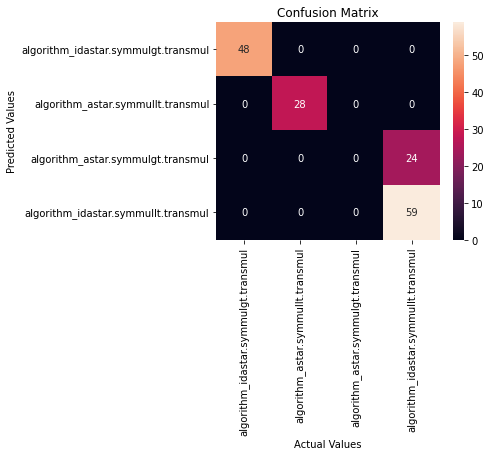

In [117]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [118]:
# CONFUSION MATRIX FOR TRAIN DATA
y_train_data = [ np.argmax(t) for t in Y_train ]
y_trainpredict_data = [ np.argmax(t) for t in Y_pred_train ]

In [119]:
cm2 =  confusion_matrix(y_train_data, y_trainpredict_data)
cm2

array([[109,   0,   0,   0],
       [  0,  56,   0,   0],
       [  0,   0,   0,  54],
       [  0,   0,   0, 149]])

In [120]:
cm_df2 = pd.DataFrame(cm2,index = ['algorithm_idastar.symmulgt.transmul','algorithm_astar.symmullt.transmul','algorithm_astar.symmulgt.transmul','algorithm_idastar.symmullt.transmul'], 
                     columns = ['algorithm_idastar.symmulgt.transmul','algorithm_astar.symmullt.transmul','algorithm_astar.symmulgt.transmul','algorithm_idastar.symmullt.transmul'])



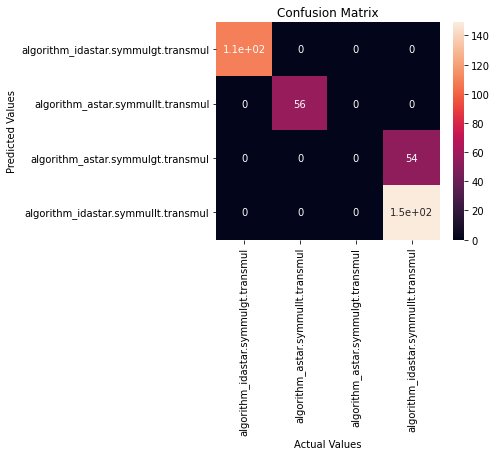

In [121]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()